In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import cv2
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '/home/mckc/caffe/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

In [2]:
caffe.set_mode_cpu()

model_def =  '/home/mckc/Downloads/vgg_face_caffe/VGG_FACE_deploy.prototxt'
model_weights = '/home/mckc/Downloads/vgg_face_caffe/VGG_FACE.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

predicted class is: 2 Aamir_Khan


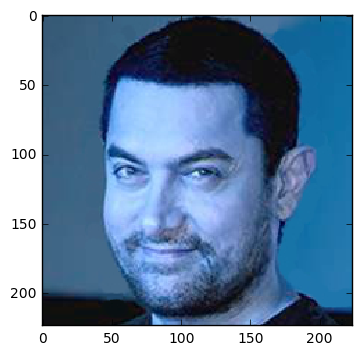

In [4]:
im = cv2.resize(cv2.imread('/home/mckc/Downloads/vgg_face_caffe/ak.png'), (224, 224)).astype(np.float32)
plt.imshow(im.astype(np.uint8))
im[:,:,0] -= 103.939
im[:,:,1] -= 116.779
im[:,:,2] -= 123.68
im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = im

### perform classification
output = net.forward()
labels = np.loadtxt('/home/mckc/Downloads/vgg_face_caffe/names.txt', str, delimiter='\t')
output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

print 'predicted class is:', output_prob.argmax(),labels[output_prob.argmax()]

In [3]:
model_def =  '/home/mckc/Downloads/faces/faces_train.prototxt'
model_weights = '/home/mckc/Downloads/vgg_face_caffe/VGG_FACE.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [5]:
np.load('/home/mckc/map.npy')

array(['Abhay', 'Arun', 'Gopika', 'Kinkar', 'Omar', 'Pandian', 'Sharath'], 
      dtype='|S32')

In [4]:
caffe.set_mode_gpu()

### load the solver and create train and test nets
solver = None  # ignore this workaround for lmdb data (can't instantiate two solvers on the same data)
solver = caffe.SGDSolver('/home/mckc/Downloads/faces/vgg_solver.prototxt')

In [5]:
solver.net.forward()  # train net
solver.test_nets[0].forward()  # test net (there can be more than one)

{'accuracy': array(0.0, dtype=float32),
 'loss': array(1.945910096168518, dtype=float32)}

In [6]:
solver.step(1)

In [7]:
solver.test_nets[0].forward() 

{'accuracy': array(1.0, dtype=float32),
 'loss': array(1.9450531005859375, dtype=float32)}

TypeError: Invalid dimensions for image data

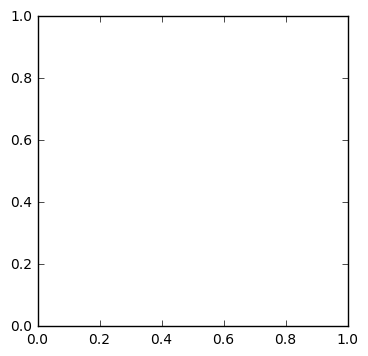

In [40]:
imshow(solver.test_nets[0].blobs['data'].data[0].transpose((2,0,0)))

In [11]:
niter = 20000
for i in range(niter):
    solver.step(1)
    print solver.test_nets[0].forward()

{'loss': array(0.7818819284439087, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7783645391464233, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7748680114746094, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7713919878005981, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7679367065429688, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7645021080970764, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7610877156257629, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7576937675476074, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.754319965839386, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7509661316871643, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': array(0.7476320862770081, dtype=float32), 'accuracy': array(1.0, dtype=float32)}
{'loss': ar

KeyboardInterrupt: 